# Project Overview

Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia diwebsite kaggle. Dataset ini berisi informasi mengenai record data pasien yang memiliki masalah dengan jantung mereka, dataset ini dapat digunakan untuk memprediksi apakah pasien akan mengalami kegagalan jantung atau tidak. Tujuan utama dari projek ini adalah membuat model untuk memprediksi kematian akibat gagal jantung menggunakan konsep Classification dengan ensemble Model. Algoritma yang dipilih pada pengerjaan projek ini adalah algoritma Random Forest Classifier,RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,dan XGBClassifier yang sudah terdapat ensemble methodnya. Kemudian menggunakan Logistic regression,svm,KNN,dan naive bayes untuk menggunakan metode ensembel VotingClassifier. Random Forest merupakan algoritma yang menerapkan metode ensemble dari algoritma decision tree. Selain itu sebelum ke tujuan utama diperlukan beberapa proses seperti data cleaning, eksplorasi data, dan data preprocessing untuk memproses dataset agar siap dan dapat menghasilkan model klasifikasi yang optimal. Dataset ini memiliki dimensi sebesar 299 rows × 13 columns dengan semua fitur/kolom bertipe data numeric/continuous.

##### Final project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut :
* Mampu memahami konsep Classification dan Ensemble Model
* Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
* Mampu mengimplementasikan ensemble model untuk membuat prediksi

#### Attribute Information :
1. age - umur pasien
2. anemia - apakah ada pengurangan hemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes di setiap kontraksi jantung
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

#### Tools:
- VsCode


# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

from collections import Counter
from scipy.stats import skew, boxcox
from imblearn.over_sampling import SMOTE
from collections import Counter

# Data Loading

In [2]:
# membuat columns dataset full
pd.set_option('display.max_columns', None)

# handle missing value
missing_values = ['na', "NA", 'NaN','-']

# rea csv
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', na_values=missing_values)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


##### Keterangan :
* anemia : 0 = No, 1 = Yes
* diabetes : 0 = No, 1 = Yes
* high_blood_pressure : 0 = No, 1 = Yes
* sex : Gender of patient Male = 1, Female = 0
* smoking : 0 = No, 1 = Yes
* DEATH_EVENT : 0 = alive, 1 = death

In [3]:
# cek jumlah baris dan kolom
baris,kolom = df.shape
print('Dataset ini memiliki: ')
print(baris, 'baris')
print(kolom, 'kolom')

Dataset ini memiliki: 
299 baris
13 kolom


In [4]:
# cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# cek kolom
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
# melihat statistik deskriptif dari data
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Dataset terlihat tidak banyak terdapat outliers

In [7]:
# cek missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# cek duplikat ata
df.duplicated().sum()

0

Dataset ini tidak terdapat missing value dan data duplikat.

# Data Cleaning

Dikarenakan dataset sudah bersih dan data numerik,maka pada tahap cleaning initidak terlalu banyak tahapan.

In [9]:
# cek 5 data teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
# ubah nama kolom menjadi kecil semua
df.columns = df.columns.str.lower()

In [11]:
# cek data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
# cek keseimbangan data
df['death_event'].value_counts()

0    203
1     96
Name: death_event, dtype: int64

# EDA (Exploratory Data Analysis)

1. Cek usia pasien berdasarkan death_status

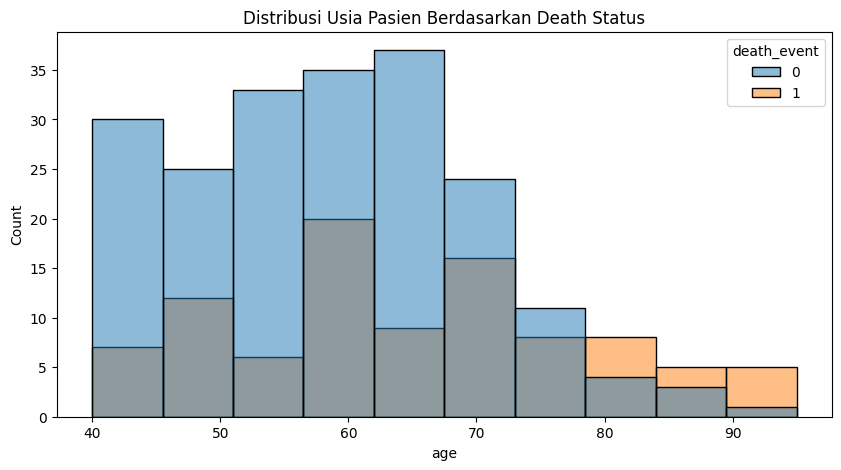

In [13]:
# visualisasi usia pasien berdasarkan death status
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='death_event')
plt.title('Distribusi Usia Pasien Berdasarkan Death Status')
plt.show()


**Insight:** Usia 60 tahun tingkat kematian sangat tinggi.

2. Berapa jumlah tiap penyakit berdasarkan parameter death status?

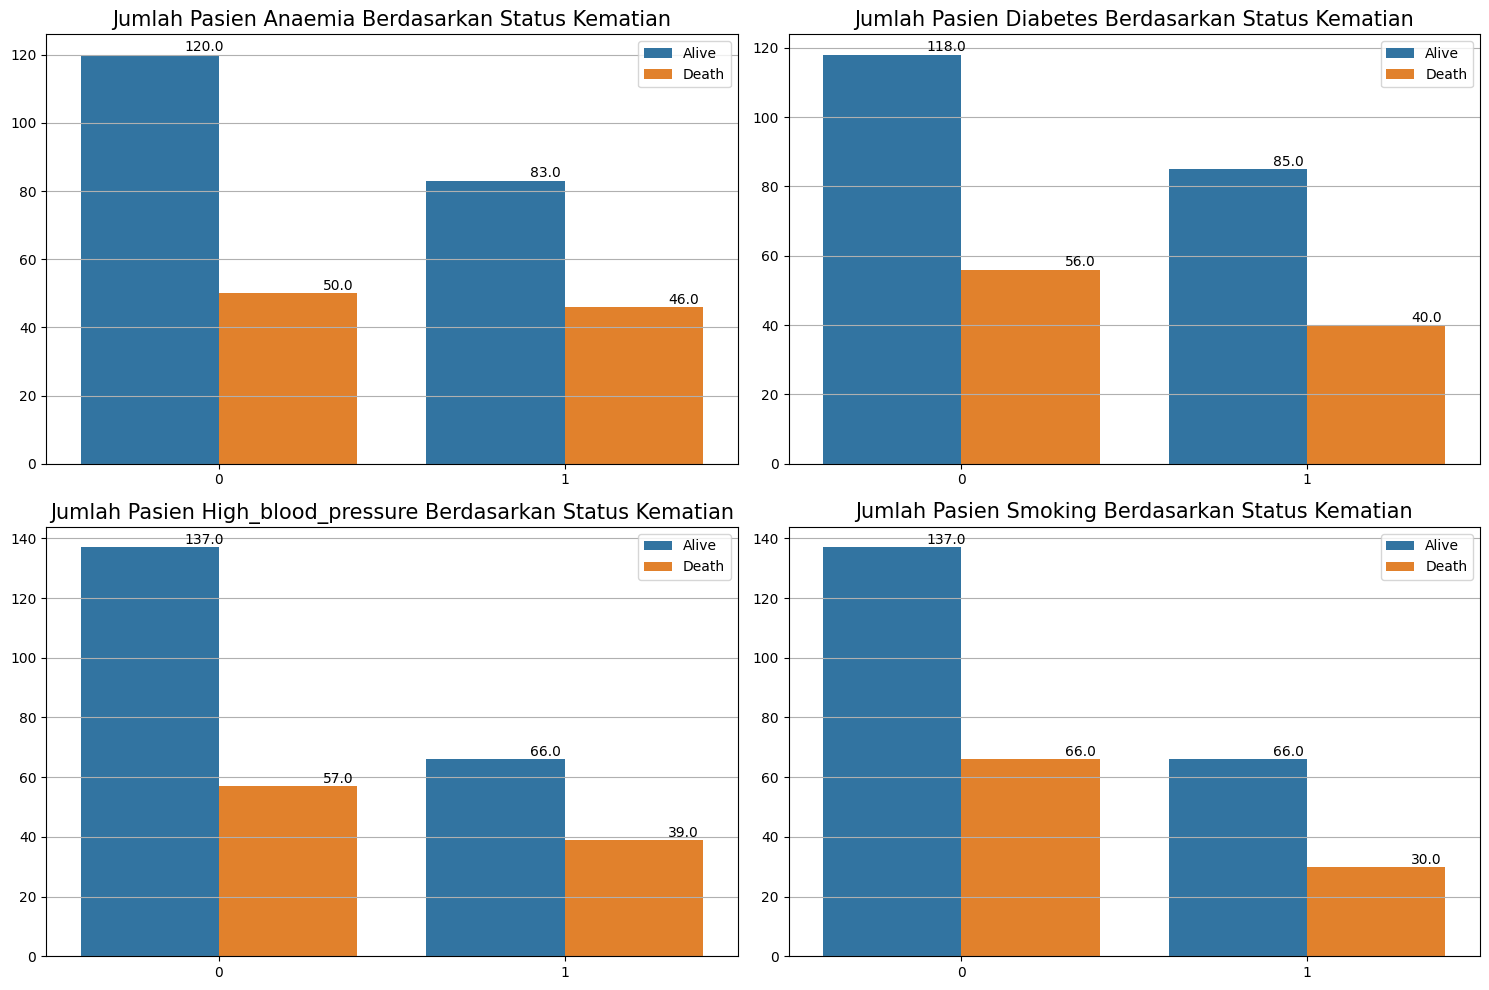

In [14]:
# buat visualisasi menjadi 2 baris
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

penyakit = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# visualisasi penyakit berdasarkan death status
for i, ax in enumerate(ax.flatten()):
    sns.countplot(data=df, x=penyakit[i], hue='death_event', ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')

    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+1))
    
    ax.set_title(f'Jumlah Pasien {penyakit[i].capitalize()} Berdasarkan Status Kematian', fontsize=15)
    ax.legend(['Alive', 'Death'])
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

**Insight:** 
- Dari 129 pasien yang terkena anemia, 35.65% pasien meninggal
- Dari 125 pasien yang terkena diabetes, 32% pasien meninggal
- Dari 105 pasien yang terkena darah tinggi, 37,14% pasien meninggal
- Dari 96 pasien yang aktif merokok, 31,25% pasien meninggal

Dikarenakan dataset yang masih kecil, data tersebut belum cukup untuk memastikan bahwa seseorang bisa meninggal akibat gejala yang ada

3. Berapa persentase pasien yang meninggal?

In [15]:
d1 = df[(df["death_event"]==0) & (df["sex"]==1)]
d2 = df[(df["death_event"]==1) & (df["sex"]==1)]
d3 = df[(df["death_event"]==0) & (df["sex"]==0)]
d4 = df[(df["death_event"]==1) & (df["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS death_event",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS death_event', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

**Insight:** Dari subplot di atas kita dapat menyimpulkan bahwa dalam kumpulan data kita 65,3% adalah PRIA (di mana 44,4% selamat dan 20,9% mati) dan 34,7% adalah WANITA (23,6% selamat dan 11,1% mati).

4. Korelasi tekanan darah tinggi terhadap kejadian kematian berdasarkan gender

In [16]:
df.groupby(['sex','high_blood_pressure','death_event']).size().unstack().apply(lambda x: x/x.sum(), axis=1)

death_event                     0         1
sex high_blood_pressure                    
0   0                    0.721311  0.278689
    1                    0.613636  0.386364
1   0                    0.699248  0.300752
    1                    0.639344  0.360656

**Insight**: terdapat beberapa perbedaan proporsi tetapi perbedaan tersebut lebih kepada kondisi tekanan darah tinggi daripada gender. untuk gender sendiri tidak terlalu memiliki pengaruh yang signifikan terhadap status kematian. Tingkat kematian untuk pasien dengan gender perempuan yang tidak memiliki tekanan darah tinggi sekitar 28% dan yang memiliki tekanan darah tinggi sekitar 39% sedangkan pada pasien laki-laki tingkat status kematian untuk pasien yang tidak mempunyai tekanan darah tinggi sekitar 30% dan yang mempunyai tekanan darah tinggi sekitar 36%. hal ini menunjukkan bahwa tekanan darah tinggi memiliki pengaruh yang signifikan terhadap status kematian.

5. Bagaimana korelasi antar variabel?

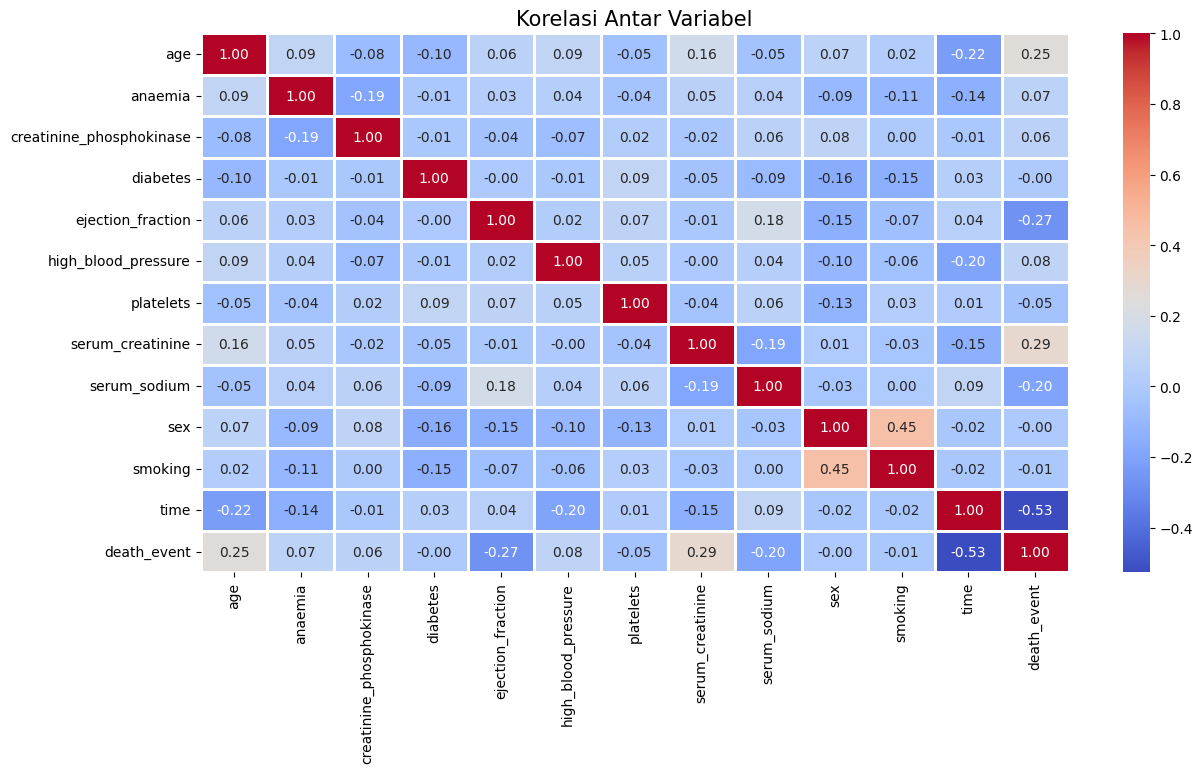

In [17]:
# visualisasi korelasi antar variabel
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Korelasi Antar Variabel', fontsize=15)
plt.show()

# Preprocessing

In [18]:
# CEK OUtlier
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1 quartile
        Q1 = np.percentile(df[c],25)
        # 3 quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1) 
    
    return multiple_outliers

In [19]:
df.loc[detect_outliers(df,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
# bersihkan outlier
data = df.drop(detect_outliers(df,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]),axis = 0).reset_index(drop=True)

Outlier sudah dibersihkan

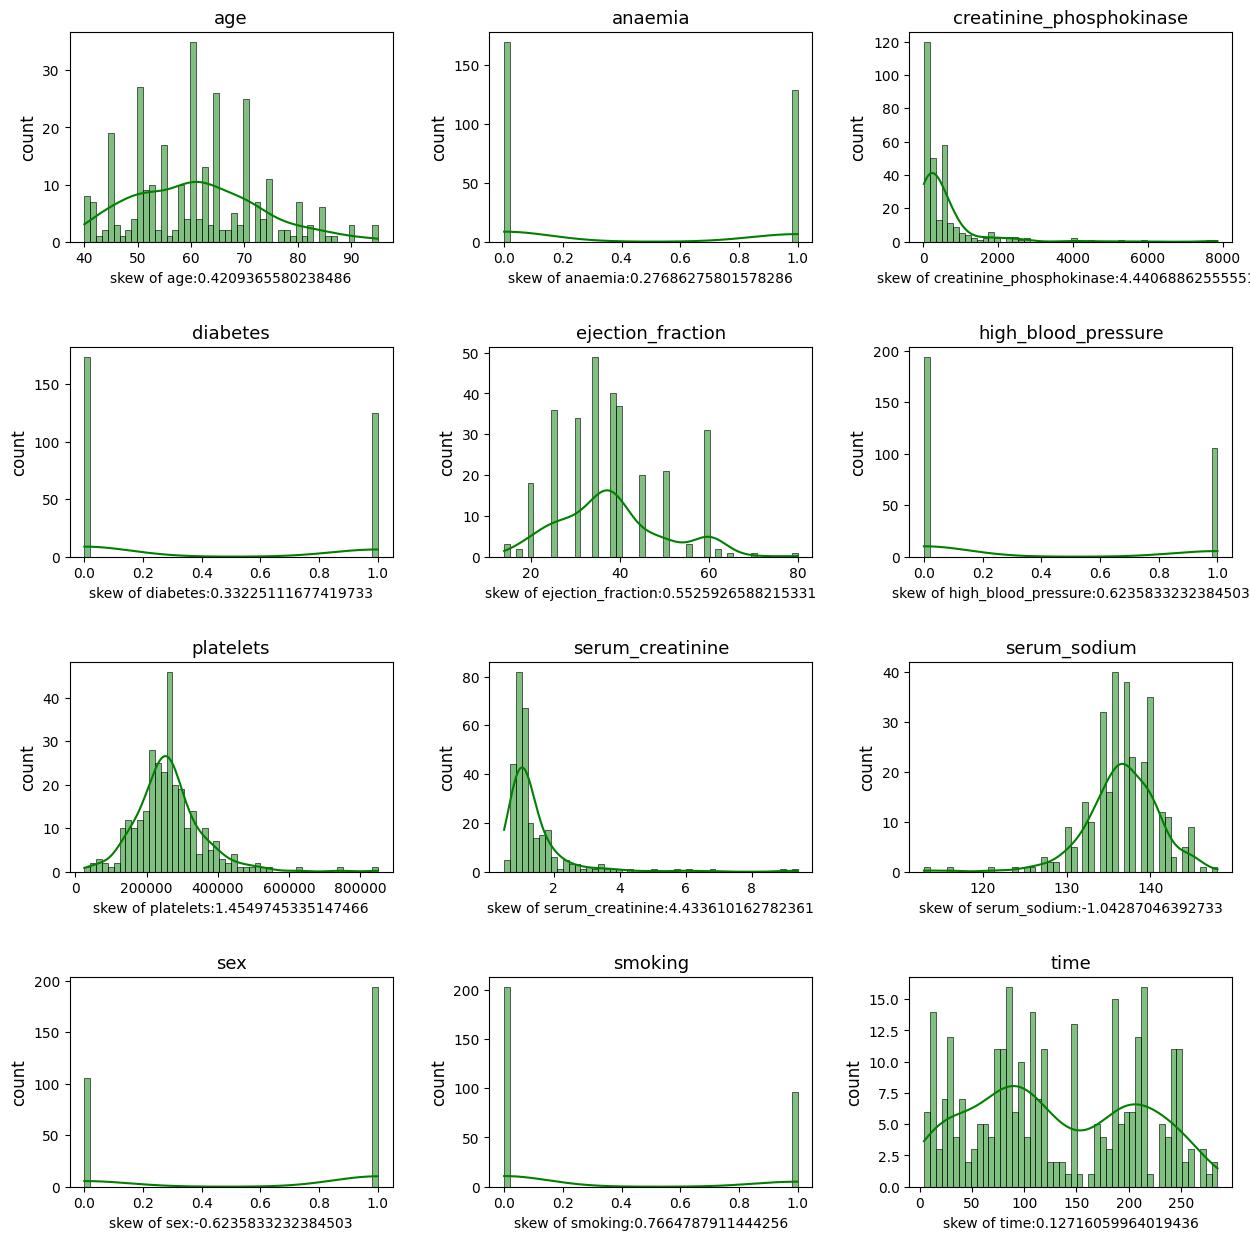

In [21]:
#  cek skewness
cols = df.loc[:,df.columns!='death_event'].columns.tolist()
plt.figure(figsize=(15,15))
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50, kde=True, color='green')

* fitur age, anaemia, dan time memiliki distribusi yang cukup simetris dengan range nilai skew -0.5 to 0.5
* fitur high_blood_pressure memiliki distribusi yang sedikit mengalami skewness dengan nilai 0.6
* fitur creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, dan serum_sodium memiliki distribusi dengan tingkat skewness yang tinggi dengan range nilai skew < -1.0 and > 1.0

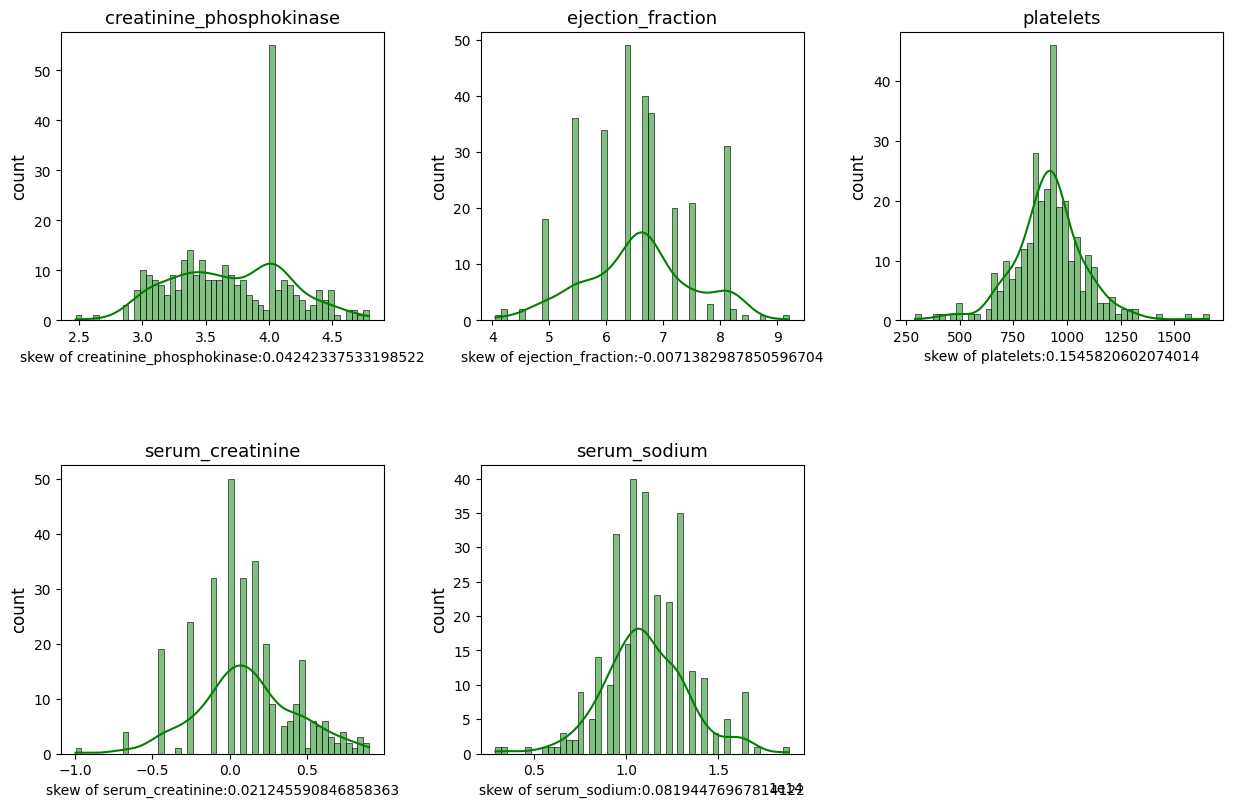

In [22]:
postive = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium']
plt.figure(figsize=(15,15))
for i, col in enumerate(postive):
    df[col] = boxcox(df[col])[0]
    plt.subplot(3,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50, kde=True, color='green')

Setelah dilakukan transformasi menggunakan metode BoxCox,**Metode BoxCox** adalah sebuah teknik yang digunakan untuk mengubah distribusi data yang tidak normal menjadi lebih mendekati distribusi normal. Distribusi data menjadi cukup simetris dengan range nilai skew sekitar -0.5 to 0.5

In [23]:
#  train test split
X = df.drop('death_event', axis=1)
y = df['death_event']

Dikarenakan sebelumnya dataset tidak seimbang, sehingga disini diterapkan Oversampling. Oversampling adalah salah satu teknik yang digunakan dalam pemrosesan data yang tidak seimbang (imbalanced data) untuk mengatasi masalah ketidakseimbangan kelas.

In [24]:
# oversampling data
print("Before Smote")
y.value_counts()

Before Smote


0    203
1     96
Name: death_event, dtype: int64

In [25]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

print("After Smote")
y_sm.value_counts()

After Smote


1    203
0    203
Name: death_event, dtype: int64

In [26]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = test_size, random_state = 42)

Dataset diatas dibagi menjadi 80% sebagai data train dan 20% sebagai data test

# Pendefinisian, Pelatihan, dan Evaluasi model

### 1. Model yang Berbasiskan Algoritma Ensemble

1. **Random Forest Classifier**, adalah sebuah algoritma dalam machine learning yang digunakan untuk tugas klasifikasi. Ini adalah jenis algoritma ensemble learning yang menggabungkan banyak pohon keputusan (decision tree) untuk membuat prediksi yang lebih akurat.

In [27]:
# Pendefinisian Random Forest
forest= RandomForestClassifier(n_estimators =40, random_state = 0)

# Fitting Model
forest.fit(X_train, y_train)

# Prediksi
y_pred = forest.predict(X_test)

# Evaluasi Model persentase akurasi
print('Metrics untuk Model Random Forest adalah : ')
print(classification_report(y_test, y_pred))

Metrics untuk Model Random Forest adalah : 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.86      0.88      0.87        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



2. **Gradient Boosting**, adalah sebuah metode dalam machine learning yang digunakan untuk tugas regresi dan klasifikasi. Ini adalah algoritma ensemble learning yang menggabungkan beberapa model prediksi yang lebih sederhana (biasanya decision tree) untuk menghasilkan prediksi yang lebih kuat.

In [28]:
# Pendefinisian Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)

# Fitting Model
gb.fit(X_train, y_train)

# Prediksi
y_pred = gb.predict(X_test)

# Evaluasi Model persentase akurasi
print('Metrics untuk Model Gradient Boosting adalah : ')
print(classification_report(y_test, y_pred))

Metrics untuk Model Gradient Boosting adalah : 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.84      0.88      0.86        41

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



3. **XGBoost**, adalah sebuah implementasi populer dari algoritma Gradient Boosting yang dikembangkan oleh Tianqi Chen. XGBoost dirancang untuk mengatasi kelemahan dari algoritma Gradient Boosting tradisional dan memiliki performa yang sangat baik dalam berbagai tugas regresi dan klasifikasi.

In [29]:
# Pendefinisian XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)

# Fitting Model
xgb.fit(X_train, y_train)

# Prediksi
y_pred = xgb.predict(X_test)

# Evaluasi Model persentase akurasi
print('Metrics untuk Model XGBoost adalah : ')
print(classification_report(y_test, y_pred))

Metrics untuk Model XGBoost adalah : 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.84      0.88      0.86        41

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



4. **Ada Boost**, adalah sebuah algoritma ensemble learning yang digunakan dalam tugas klasifikasi. Algoritma ini bekerja dengan menggabungkan beberapa model klasifikasi sederhana yang disebut "weak learner" untuk menghasilkan prediksi yang lebih kuat.

In [30]:
# adaBoost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Fitting Model
ada.fit(X_train, y_train)

# Prediksi
y_pred = ada.predict(X_test)

# Evaluasi Model persentase akurasi
print('Metrics untuk Model adaBoost adalah : ')
print(classification_report(y_test, y_pred))

Metrics untuk Model adaBoost adalah : 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.80      0.85      0.82        41

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82



### 2. Model yang Berbasiskan Ensemble dari Beberapa Algoritma Individual

In [31]:
# logistic regression
logreg = LogisticRegression()

# support vector machine
svc = SVC()

# KNN
knn = KNeighborsClassifier(n_neighbors=5)

# naive bayes
nb = GaussianNB()

Selanjutnya,yaitu menggunakan ***Voting Classifier***. Yaitu sebuah metode ensemble learning dalam machine learning yang digunakan untuk melakukan klasifikasi. Tujuan utama dari Voting Classifier adalah untuk menggabungkan beberapa model klasifikasi yang berbeda untuk mencapai keputusan yang lebih akurat secara kolektif.

In [32]:
# pendefinisian voting classifier
voting_clf = VotingClassifier(estimators=[('rf', forest), ('gb', gb), ('xgb', xgb), ('ada', ada), ('logreg', logreg), ('svc', svc), ('knn', knn), ('nb', nb)], voting='hard')

# Fitting Model
voting_clf.fit(X_train, y_train)

# Prediksi
y_pred = voting_clf.predict(X_test)

# Evaluasi Model persentase akurasi
print('Metrics untuk Model Voting Classifier adalah : ')
print(classification_report(y_test, y_pred))

Metrics untuk Model Voting Classifier adalah : 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        41
           1       0.97      0.78      0.86        41

    accuracy                           0.88        82
   macro avg       0.89      0.88      0.88        82
weighted avg       0.89      0.88      0.88        82



# Model Interface

In [33]:
# coba dengan data random
data = pd.DataFrame({'age':[50, 60, 70, 80, 90],
                        'anaemia':[0, 1, 0, 1, 0],
                        'creatinine_phosphokinase':[100, 200, 300, 400, 500],
                        'diabetes':[0, 1, 0, 1, 0],
                        'ejection_fraction':[20, 30, 40, 50, 60],
                        'high_blood_pressure':[0, 1, 0, 1, 0],
                        'platelets':[100000, 200000, 300000, 400000, 500000],
                        'serum_creatinine':[1, 2, 3, 4, 5],
                        'serum_sodium':[100, 200, 300, 400, 500],
                        'sex' :[0, 1, 0, 1, 0],
                        'smoking':[0, 1, 0, 1, 0],
                        'time':[10, 20, 30, 40, 50]
})

# Prediksi
y_pred = voting_clf.predict(data)

# Hasil Prediksi
print('Hasil Prediksi : ')
print(y_pred)

Hasil Prediksi : 
[1 1 1 1 1]


**Insight:** 1 = Meninggal, 0 = Hidup. Maka dalam percobaan dengan menggunakan data random ini hasil prediksi menunjukkan bahwa orang tersebut meninggal.

# Kesimpulan

<ol>
<li>Pada dataset ini dilakukan evaluasi model dengan Random Forest Classifier, Gradient Boosting, Ada Boost, dan XG Boost.</li>
<li>Dengan menggunakan <b>Voting Classifier</b>, Yaitu sebuah metode ensemble learning dengan melakukan kombinasi model Logistic Regression, SVC, KNN, Naive Bayes dalam machine learning yang digunakan untuk melakukan klasifikasi mendapatkan akurasi tertinggi untuk dataset ini, dengan menggabungkan  yaitu sebesar <b>88%.</b>

Dataset ini sudah bagus dari awalnya sehingga memudahkan dalam proses pembuatan model. Dari hasil analisis pada dataset, usia 60 tahun menjadi usia yang paling banyak kematian. Dimana dalam kumpulan data kita 65,3% adalah PRIA (di mana 44,4% selamat dan 20,9% mati) dan 34,7% adalah WANITA (23,6% selamat dan 11,1% mati). Darah tinggi menjadi salah satu penyakit yang memiliki pengaruh terhadap kematian.

Dari beberapa algoritma yang diterapkan, hasilnya yaitu Random Forest mendapatkan akurasi 87%, gradient boosting 85%, xgboost 85%, ada boost 82%, dan voting classifier 88%. Sehingga algoritma yang cukup bagus untuk diterapkan pada kasus ini menurut hasil analisis yaitu algoritma voting classifier.

Voting Classifier merupakan salah satu algoritma ensemble learning. Voting classifier adalah metaclassifier yang melakukan prediksi dengan menggabungkan hasil prediksi dari beberapa base classifier berdasarkan strategi pemungutan suara yang telah ditentukan sebelumnya. Voting Classifier memanfaatkan kelebihan dari masing-masing base classifier di mana setiap classifier melakukan yang terbaik sambil meratakan dampak dari kelemahan masing-masing base classifier di bagian lain dari dataset. Dalam Voting Classifier setiap base classifier melatih dan disetel pada dataset yang sama secara paralel. Dalam membuat prediksi akhir, Voting Classifier mengkombinasikan hasil prediksi base classifier dengan menggunakan soft voting atau hard voting dengan <b>Hard voting</b> memprediksi target berdasarkan suara mayoritas.